# Importdando e Concatenando

In [153]:
import pandas as pd

In [154]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')


In [155]:
# Variável frame que irá atribuir uma lisca com duas liastas dos imports anteriores
frame = [nomes_f, nomes_m]

In [156]:
# Variável que irá concatenar a lista frame, transformar em uma data frame e retornar apenas os nomes
nomes = pd.concat(frame)['nome'].to_frame()

In [157]:
# Retorna 5 nomes aleatórios dentro do dataframe
nomes.sample(5)

,nome
45,ANDREIA
152,LARA
18,RAIMUNDO
198,ISADORA
79,MONICA


# Inserindo nova váriavel ID aleatória

In [158]:
import numpy as np
np.random.seed(123)

In [159]:
nomes['ID_Aluno'] = np.random.permutation(len(nomes)) + 1

In [160]:
nomes.sample(5)

,nome,ID_Aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


## Inserindo Variável E-mail

In [161]:
# Definindo o dominio do email
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, len(nomes))

In [162]:
nomes.sample(5)

,nome,ID_Aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [163]:
# Inserindo no Data Frame 'nomes' a concatenação dos dados da coluna nome com o domínio do e-mail
nomes['e-mail'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [164]:
nomes.sample(5)

,nome,ID_Aluno,dominio,e-mail
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a Tabela Cursos

In [165]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [166]:
import html5lib

In [167]:
cursos = pd.read_html(url)

In [168]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [169]:
# transforma em um data frame
cursos = cursos[0]

In [170]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [171]:
type(cursos)

pandas.core.frame.DataFrame

In [172]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index deos Cursos

In [173]:
cursos.rename(columns = {'Nome do curso': 'nome_do_curso'}, inplace = True)

In [174]:
# Adicionando ID

In [175]:
cursos['ID_Cursos'] = cursos.index + 1

In [176]:
cursos.head()

,nome_do_curso,ID_Cursos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [177]:
# Atribui ao index do data frame o valor id_cursos
cursos.set_index('ID_Cursos', inplace = True)

In [178]:
cursos.head()

,nome_do_curso
ID_Cursos,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [179]:
nomes.sample(5)

,nome,ID_Aluno,dominio,e-mail
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [180]:
# Faz com que cada aluno receba uma quantidade de matrículas, onde varios alunos teram 1 matricula, alguns 2 e poucos mais de 2
nomes['Matricula'] = np.ceil(np.random.exponential(size = len(nomes))).astype(int)

In [181]:
nomes

,nome,ID_Aluno,dominio,e-mail,Matricula
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [182]:
nomes['Matricula'].describe()

count    400.000000
mean       1.657500
std        1.050215
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: Matricula, dtype: float64

In [183]:
import seaborn as sns

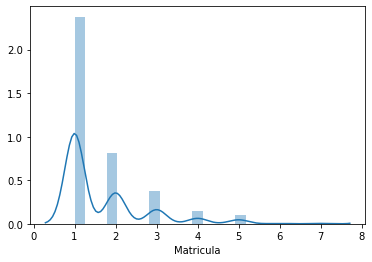

In [184]:
sns.distplot(nomes.Matricula)

In [185]:
nomes.Matricula.value_counts()

1    248
2     85
3     39
4     15
5     11
7      1
6      1
Name: Matricula, dtype: int64

# Selecionando Cursos

In [186]:
# Lista vazia que irá receber o ide do aluno, e os cursos de acordo com a quantidade de matrículas, de acordo com a prob de x
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [187]:
# loop para percorrer o data frame 'nomes' e identificar o ID_Alunos e a quantidade de Matriculas
# 'id' irá receber o valor do ID_Aluno
# 'matriculas' irá receber o valor de Matricula
# Loop que define irá dar ao ID a probabilidade do curso e atruir a lista todas_matriculas
# 'matriculas' Data Frame dos ID_Alunos e os cursos recebidos de acordo com a quantidade de matriculas encontradas
for index, row in nomes.iterrows():
    id = row.ID_Aluno
    matriculas = row.Matricula
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['ID_Aluno', 'ID_Curso'])

In [188]:
matriculas.head(10)

,ID_Aluno,ID_Curso
0,235,7
1,43,7
2,43,17
3,43,8
4,304,19
5,156,17
6,343,15
7,310,16
8,310,13
9,55,6


In [189]:
# Faz um agrupamento po Curso e faz um count em quantidade de alunos por curso, e renomeio o ID_Aluno por quantidade de alunos
matriculas_por_curso = matriculas.groupby('ID_Curso').count().join(cursos['nome_do_curso']).rename(columns = {'ID_Aluno': 'Quantidade_de_Alunos'})

In [193]:
matriculas_por_curso.head()

,Quantidade_de_Alunos,nome_do_curso
ID_Curso,,
1,33,Lógica de programação
2,3,Java para Web
3,6,C# para Web
4,21,Ruby on Rails
5,20,Cursos de Python


In [194]:
matriculas.head()

,ID_Aluno,ID_Curso
0,235,7
1,43,7
2,43,17
3,43,8
4,304,19


In [195]:
nomes.head()

,nome,ID_Aluno,dominio,e-mail,Matricula
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [196]:
cursos.head()

,nome_do_curso
ID_Cursos,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Exportando dados

In [204]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [205]:
pd.read_csv('matriculas_por_curso.csv')

,Quantidade_de_Alunos,nome_do_curso
0,33,Lógica de programação
1,3,Java para Web
2,6,C# para Web
3,21,Ruby on Rails
4,20,Cursos de Python
5,16,PHP com MySql
6,50,.NET para web
7,42,Novas integrações com Java
8,43,TDD com Java
9,37,Código limpo com C#


In [206]:
matriculas_json = matriculas_por_curso.to_json()

In [207]:
matriculas_html = matriculas_por_curso.to_html()